In [26]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key
from datetime import datetime
from scipy.stats import linregress

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(47.24484535486957, 143.6968865751815),
 (77.54444878779907, 1.343584116336615),
 (57.56553158845685, 93.07838271864614),
 (53.161293356049526, -140.11282904328462),
 (-45.92926342391589, -74.9935450154439),
 (17.369777232914686, -3.149550160681059),
 (-73.5487447259268, 4.475821781224653),
 (51.46836670140905, -107.93918675721818),
 (27.983964977031448, 161.8105488136918),
 (48.03736756468814, -143.4320565256952),
 (-1.6357703097844762, 164.1044318707364),
 (-59.8151703162729, -168.43766702766584),
 (-24.79131313340187, 86.12105544066196),
 (19.75872711030621, 94.78101729776643),
 (63.26779310114861, -126.60405374863485),
 (65.9097290660963, -58.62548620279024),
 (47.99581663237504, 178.89052672787898),
 (-13.832538508611776, -74.74431763057545),
 (-74.15227062193266, -109.299152854095),
 (-44.33909889090477, 57.55174530556519),
 (19.077387723047167, 147.28103530964654),
 (-53.35722914765452, -49.53783956443863),
 (-49.37606086982307, 48.7785673245771),
 (-85.18670888725215, 44.81960

In [7]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

612

In [10]:
# Create an empty list to hold the weather data.
city_data = []
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dolinsk
Processing Record 2 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 3 of Set 1 | kazachinskoye
Processing Record 4 of Set 1 | sitka
Processing Record 5 of Set 1 | coihaique
Processing Record 6 of Set 1 | tombouctou
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | rosetown
Processing Record 9 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 10 of Set 1 | auki
Processing Record 11 of Set 1 | vaini
Processing Record 12 of Set 1 | bengkulu
Processing Record 13 of Set 1 | magway
Processing Record 14 of Set 1 | norman wells
Processing Record 15 of Set 1 | sisimiut
Processing Record 16 of Set 1 | nikolskoye
Processing Record 17 of Set 1 | rio grande
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 20 of Set 1 | airai
Processing Record 21 of Set 1 | m

Processing Record 37 of Set 4 | khatanga
Processing Record 38 of Set 4 | san cristobal
Processing Record 39 of Set 4 | ruatoria
City not found. Skipping...
Processing Record 40 of Set 4 | caloto
Processing Record 41 of Set 4 | kamenskoye
City not found. Skipping...
Processing Record 42 of Set 4 | cootamundra
Processing Record 43 of Set 4 | mount gambier
Processing Record 44 of Set 4 | guerrero negro
Processing Record 45 of Set 4 | ontario
Processing Record 46 of Set 4 | saint george
Processing Record 47 of Set 4 | darhan
Processing Record 48 of Set 4 | iqaluit
Processing Record 49 of Set 4 | ilulissat
Processing Record 50 of Set 4 | kalianget
Processing Record 1 of Set 5 | talcahuano
Processing Record 2 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 3 of Set 5 | umm kaddadah
Processing Record 4 of Set 5 | la ronge
Processing Record 5 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 6 of Set 5 | villaviciosa
Processing Record 7 of S

Processing Record 25 of Set 8 | nhamunda
Processing Record 26 of Set 8 | todos santos
Processing Record 27 of Set 8 | malmesbury
Processing Record 28 of Set 8 | campos do jordao
Processing Record 29 of Set 8 | tuatapere
Processing Record 30 of Set 8 | maria aurora
Processing Record 31 of Set 8 | samarai
Processing Record 32 of Set 8 | avera
Processing Record 33 of Set 8 | impfondo
Processing Record 34 of Set 8 | marsaxlokk
Processing Record 35 of Set 8 | ismailia
Processing Record 36 of Set 8 | athens
Processing Record 37 of Set 8 | fortuna
Processing Record 38 of Set 8 | ponta delgada
Processing Record 39 of Set 8 | takoradi
Processing Record 40 of Set 8 | vestmannaeyjar
Processing Record 41 of Set 8 | mercedes
Processing Record 42 of Set 8 | pochutla
Processing Record 43 of Set 8 | tawkar
City not found. Skipping...
Processing Record 44 of Set 8 | nyurba
Processing Record 45 of Set 8 | melfi
Processing Record 46 of Set 8 | vostok
Processing Record 47 of Set 8 | tupik
Processing Recor

Processing Record 18 of Set 12 | hambantota
Processing Record 19 of Set 12 | sinnamary
Processing Record 20 of Set 12 | guia de isora
Processing Record 21 of Set 12 | paamiut
Processing Record 22 of Set 12 | troitsko-pechorsk
Processing Record 23 of Set 12 | vila
Processing Record 24 of Set 12 | port hedland
Processing Record 25 of Set 12 | arlit
Processing Record 26 of Set 12 | rancagua
Processing Record 27 of Set 12 | ternate
Processing Record 28 of Set 12 | estrela
Processing Record 29 of Set 12 | platanos
Processing Record 30 of Set 12 | shimoda
Processing Record 31 of Set 12 | san jose
Processing Record 32 of Set 12 | grand centre
City not found. Skipping...
Processing Record 33 of Set 12 | tumannyy
City not found. Skipping...
Processing Record 34 of Set 12 | obihiro
Processing Record 35 of Set 12 | blagoyevo
Processing Record 36 of Set 12 | half moon bay
Processing Record 37 of Set 12 | tocopilla
Processing Record 38 of Set 12 | byron bay
Processing Record 39 of Set 12 | mizdah
P

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Dolinsk,47.3500,142.8000,67.86,85,100,7.67,RU,2021-08-01 00:16:07
1,Kazachinskoye,57.6953,93.2761,59.67,75,31,2.51,RU,2021-08-01 00:16:08
2,Sitka,57.0531,-135.3300,64.29,77,40,9.22,US,2021-08-01 00:16:08
3,Coihaique,-45.5752,-72.0662,31.95,86,0,3.44,CL,2021-08-01 00:16:09
4,Tombouctou,20.0000,-3.0000,96.91,25,32,10.09,ML,2021-08-01 00:16:09
5,Hermanus,-34.4187,19.2345,53.80,89,99,7.05,ZA,2021-08-01 00:13:30
6,Rosetown,51.5501,-108.0014,88.99,19,0,6.91,CA,2021-08-01 00:16:09
7,Auki,-8.7676,160.7034,80.44,78,100,4.94,SB,2021-08-01 00:16:10
8,Vaini,-21.2000,-175.2000,73.71,75,100,26.87,TO,2021-08-01 00:13:53
9,Bengkulu,-3.8004,102.2655,74.79,90,43,3.58,ID,2021-08-01 00:16:10


In [15]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Dolinsk,RU,2021-08-01 00:16:07,47.3500,142.8000,67.86,85,100,7.67
1,Kazachinskoye,RU,2021-08-01 00:16:08,57.6953,93.2761,59.67,75,31,2.51
2,Sitka,US,2021-08-01 00:16:08,57.0531,-135.3300,64.29,77,40,9.22
3,Coihaique,CL,2021-08-01 00:16:09,-45.5752,-72.0662,31.95,86,0,3.44
4,Tombouctou,ML,2021-08-01 00:16:09,20.0000,-3.0000,96.91,25,32,10.09
5,Hermanus,ZA,2021-08-01 00:13:30,-34.4187,19.2345,53.80,89,99,7.05
6,Rosetown,CA,2021-08-01 00:16:09,51.5501,-108.0014,88.99,19,0,6.91
7,Auki,SB,2021-08-01 00:16:10,-8.7676,160.7034,80.44,78,100,4.94
8,Vaini,TO,2021-08-01 00:13:53,-21.2000,-175.2000,73.71,75,100,26.87
9,Bengkulu,ID,2021-08-01 00:16:10,-3.8004,102.2655,74.79,90,43,3.58


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

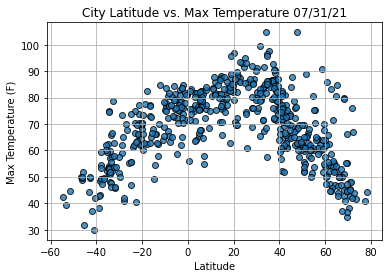

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig1.png")
# Show plot.
plt.show()

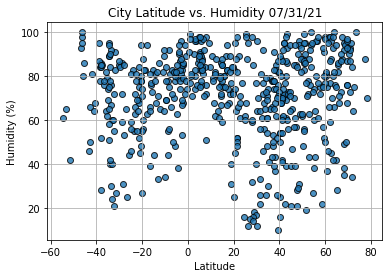

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

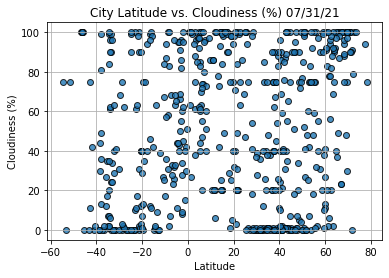

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

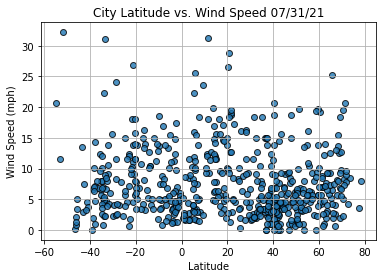

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [39]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [31]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

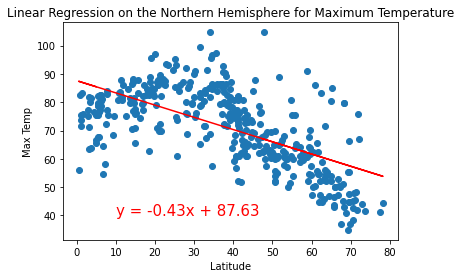

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature',
                       'Max Temp',(10,40))

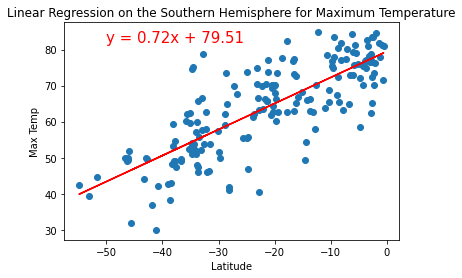

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature',
                       'Max Temp',(-50,82))

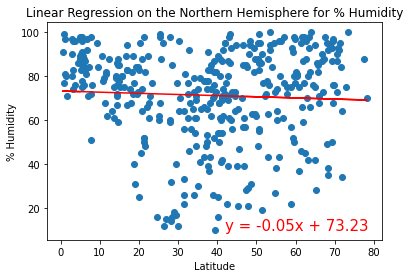

In [54]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity',
                       '% Humidity',(42,10))

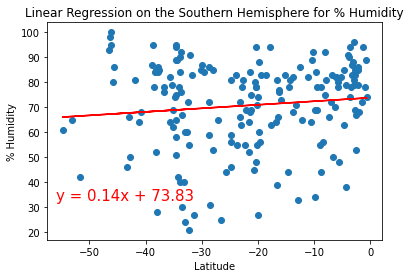

In [61]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity',
                       '% Humidity',(-56,33))

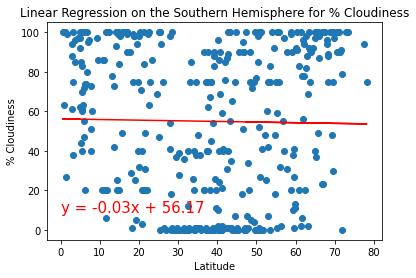

In [70]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness',
                       '% Cloudiness',(0,9))

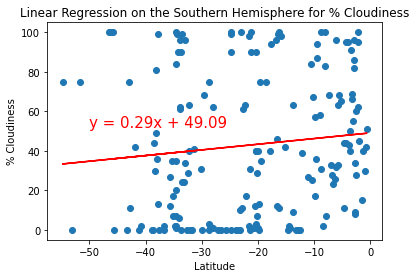

In [71]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness',
                       '% Cloudiness',(-50,52))

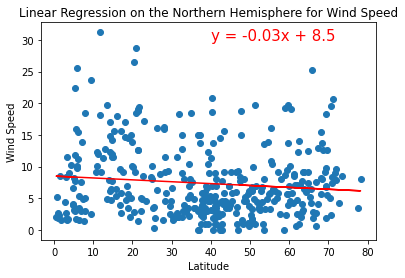

In [74]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed',
                       'Wind Speed',(40,30))

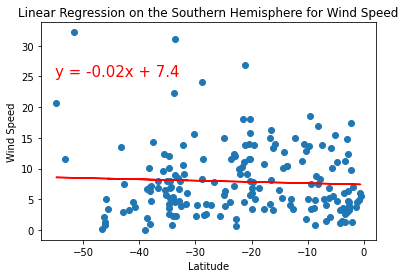

In [77]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed',
                       'Wind Speed',(-55,25))